In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import graphviz
import os
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# %load import_set2.py
# sklearn dataset
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D, axes3d

# sklearn 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## 2.3.3 선형 모델

### 회귀의 선형 모델

w[0]: 0.393906  b: -0.031804


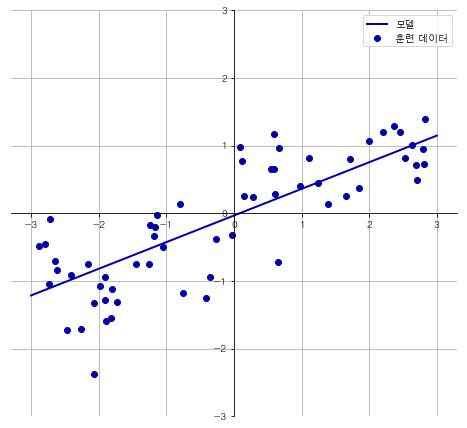

In [3]:
mglearn.plots.plot_linear_regression_wave()

특성이 많은 dataset이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있습니다.  
특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 (훈련세트에 대해서) 선형 함수로 모델링할 수 있습니다.

### 선형 회귀 (최소제곱법)

In [4]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_ :", lr.coef_)               # 기울기 - Numpy 배열
print("lr.intercept_ :", lr.intercept_)     # 절편

lr.coef_ : [0.394]
lr.intercept_ : -0.031804343026759746


In [6]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


훈련 세트와 테스트 세트의 R^2 점수가 매우 비슷한 것은 과소적합 상태를 의미합니다

In [7]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lr = LinearRegression().fit(X_train, y_train)

In [8]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


고차원 dataset에서는 선형 모델의 성능이 매우 높아져 과대적합이 일어날 수 있습니다.  
훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과적합되었다는 확실한 신호입니다.

### 리지(Ridge) 회귀

리지도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용합니다.  
가중치 w의 모든 원소가 0에 가깝게 (모든 특성이 출력에 주는 영향을 최소한으로) 규제로 제한합니다.  
리지 회귀에 사용하는 규제 방식은 L2 규제!!

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


테스트 세트에 대한 점수는 LinearRegression보다 높습니다.  
-> 과대적합이 적고 일반화된 모델이 된다는 의미!  
alpha값을 높이면 계수를 0에 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있습니다.

In [10]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


alpah값을 줄이면 계수에 대한 제약이 풀려서 너무 일반화된 모델이 됩니다.  
(LinearRegression 모델과 거의 같아집니다.)

In [11]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


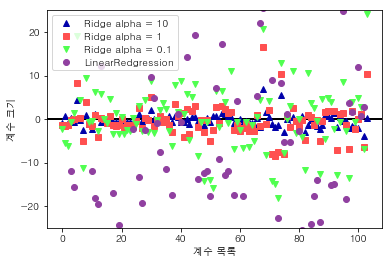

In [12]:
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRedgression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend();

보스턴 주택가격 데이터셋에 대한 리지 회귀와 선형 회귀의 학습 곡선

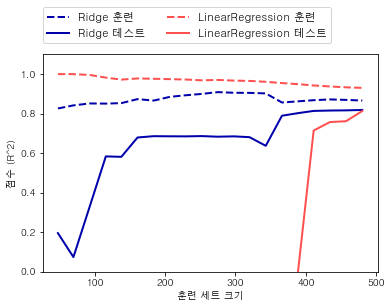

In [13]:
mglearn.plots.plot_ridge_n_samples()

- 데이터가 많아질수록 두 모델의 성능은 좋아지고 마지막에 선형 회귀가 리지 회귀를 따라잡습니다.  
(데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것입니다.)  
- 선형 회귀의 훈련 데이터 성능이 감소하는 것은 데이터가 많아질수록 모델이 과대적합하기 어려워지기 때문입니다.

### 라소 (Lasso)

라소는 리지와 마찬가지로 계수를 0에 가깝게 만들지만 방식이 조금 달라 L1규제라고 합니다.

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 갯수 :", np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 갯수 : 4


In [15]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생합니다.
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 갯수 :", np.sum(lasso001.coef_ != 0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 갯수 : 33


In [16]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 갯수 :", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 갯수 : 96


alpha값을 낮추면 모델의 복잡도는 증가하여 성능이 좋아지지만  
너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해집니다.

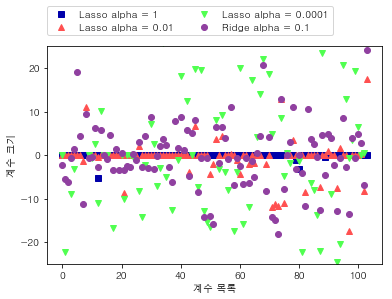

In [17]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc = (0, 1.05));
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기");

보통은 리지 회귀를 선호하지만 특성이 많고 그 중 일부만 중요하다면 Lasso가 더 좋은 선택일 수 있습니다.  
또한 Lasso가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어줍니다.  
scikit-learn은 Lasso와 Ridge의 패널티를 결합한 ElasticNet도 제공합니다. (L1, L2 규제를 위한 매개변수 두 개를 조정해야 함)

### 분류용 선형 모델

분류형 선형 모델에서는 **결정경계**가 입력의 선형 함수입니다.  
-> 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기입니다.

#### 선형 모델을 학습시키는 알고리즘  
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

#### 가장 널리 알려진 두 개의 선형 분류 알고리즘
- 로지스틱 회귀(Logistic Regression) : linear_model.LogisticRegression
- 서포트 벡터 머신(SVM) : svm.LinearSVC

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


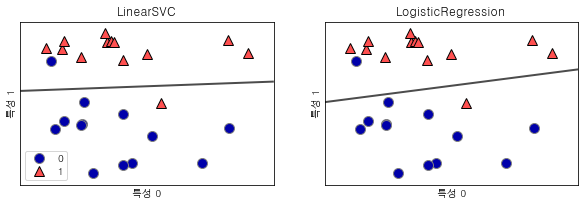

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend();

Logistic Regression과 SVM은 기본적으로 **L2**를 사용합니다.  
규제의 강도를 결정하는 매개변수는 **C**입니다. C의 값이 높아지면 규제는 감소합니다.  
알고리즘은 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면,  
C의 값을 높이면 개개의 데이터 포인트를 정확히 분휴하려고 노력할 것입니다.

**LinearSVC를 사용한 예**

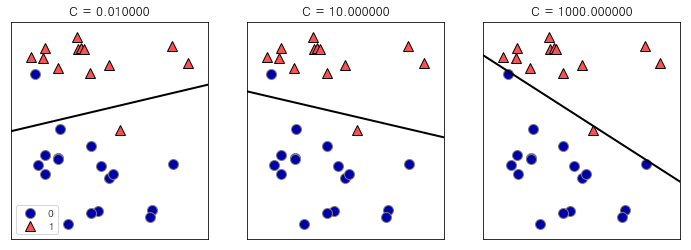

In [19]:
mglearn.plots.plot_linear_svc_regularization()

1. 왼쪽 그림은 아주 작은 C값 때문에 규제가 많이 적용되었습니다.  
-> 비교적 수평에 가까운 결정 경계를 만들었고 잘못 분류한 데이터 포인트는 두 개입니다.  
2. 중간 그림은 왼쪽보다는 C값이 조금 더 크며 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어졌습니다.  
3. 오른쪽 그림은 C값이 아주 커져 결정 경계는 더 기울었습니다.  
-> 클래스 0의 모든 데이터 포인트를 올바로 분류하였지만 클래스 1의 포인트 하나는 여전히 잘못 분류되었습니다.  
-> 모든 데이터 포인트를 정확하게 분류하려고 애썼지만 클래스의 전체적인 배티를 잘 파악하지 못하였습니다. (과대적합된 것 같습니다.)

#### (1) 기본값 C = 1

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.958


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


정확도가 95%로 성능이 좋지만 훈련 세트와 테스트 세트의 정확도가 거의 같으므로 과소적합인 것 같습니다.

#### (2) C = 100  
C가 1일 때보다 모델의 제약이 더 풀렸고 복잡도가 높아졌습니다.

In [21]:
logreg100 = LogisticRegression(C = 100).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.972
테스트 세트 점수 : 0.965


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


복잡도가 높은 모델일 수록 성능이 좋음을 말해줍니다.

#### (3) C = 0.01  
C가 1일 때보다 규제가 더 강해졌습니다.

In [22]:
logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수 : 0.934
테스트 세트 점수 : 0.930


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


과소적합된 모델이기 때문에 기본 매개변수일 때보다 정확도가 더 낮아집니다.

#### 유방암 dataset에 각기 다른 C 값을 사용하여 만든 로지스틱 회귀의 계수

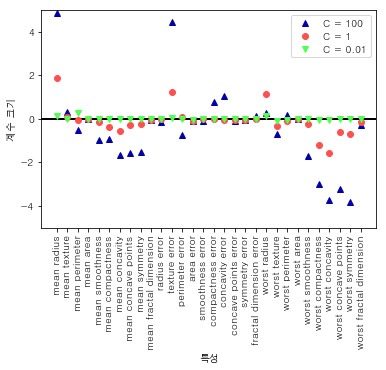

In [23]:
plt.plot(logreg100.coef_.T, '^', label = "C = 100")
plt.plot(logreg.coef_.T, 'o', label = "C = 1")
plt.plot(logreg001.coef_.T, 'v', label = "C = 0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend();

#### 더 이해하기 쉽게 L1규제를 사용한 분류 정확도와 계수 그래프

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C = 0.001인 L1 로지스틱 회귀의 훈련 정확도 : 0.91
C = 0.001인 L1 로지스틱 회귀의 테스트 정확도 : 0.92


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C = 1.000인 L1 로지스틱 회귀의 훈련 정확도 : 0.96
C = 1.000인 L1 로지스틱 회귀의 테스트 정확도 : 0.96
C = 100.000인 L1 로지스틱 회귀의 훈련 정확도 : 0.99
C = 100.000인 L1 로지스틱 회귀의 테스트 정확도 : 0.98


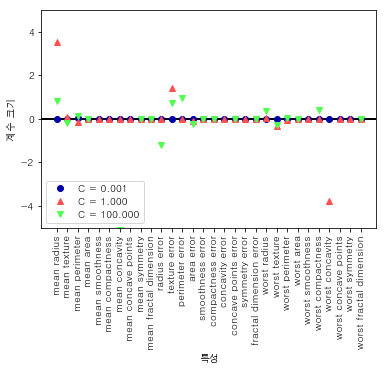

In [24]:
for c, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C = c, penalty = "l1").fit(X_train, y_train)
    print("C = {:.3f}인 L1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(c, lr_l1.score(X_train, y_train)))
    print("C = {:.3f}인 L1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(c, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label = "C = {:.3f}".format(c))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc = 3);

### 다중 클래스 분류용 선형 모델

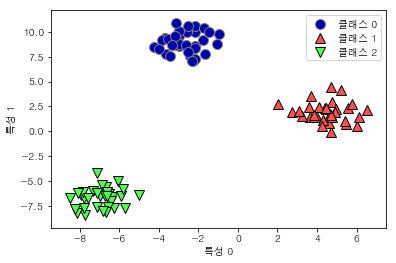

In [25]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"]);

이 dataset은 2차원이며 각 클래스의 데이터는 정규분포(가우시안 분포)를 따릅니다.

In [26]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기 :", linear_svm.coef_.shape)
print("절편 배열의 크기 :", linear_svm.intercept_.shape)  # 1차원 벡터

계수 배열의 크기 : (3, 2)
절편 배열의 크기 : (3,)


#### 세 개의 분류기가 만드는 경계 시각화

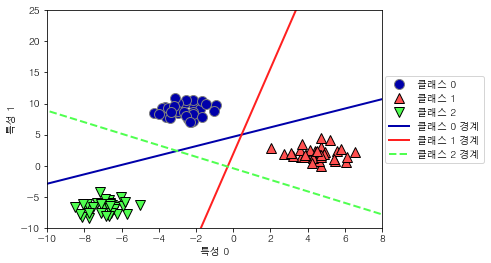

In [27]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.ylim(-10, 25)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc = (1.01, 0.3));

그림 중앙의 삼각형 영역은 세 분류기 모두 나머지로 분류했습니다.  
이 곳의 데이터 포인트는 분류 공식의 결과가 가장 높은 클래스(가장 가까운 직선의 클래스)로 분류될 것입니다.

#### 세 개의 일대다 분류기가 만든 다중 클래스 결정 경계

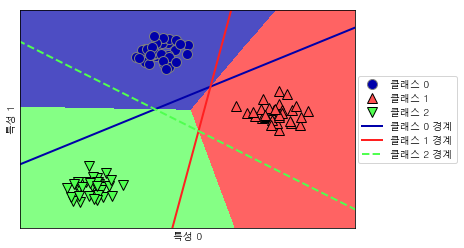

In [28]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc = (1.01, 0.3));
plt.xlabel("특성 0")
plt.ylabel("특성 1");

### 장단점과 매개변수

선형 모델의 주요 매개변수  
- 회귀 모델 : **alpha**
- LinearSVC와 LogisticRegression : **C**

**alpha**값이 클수록, **C**값이 작을수록 모델이 단순해집니다.  
1. 보통 C와 alpha는 로그 스케일(10배씩)로 최적치를 정합니다.
2. L1 규제를 사용할지 L2 규제를 사용할지 정합니다.
    - 중요한 특성이 많지 않다면 **L1**
    - 기본적으로는 **L2**

선형 모델의 장점  
1. 학습 속도와 예측이 빠릅니다.
2. 매우 큰 dataset과 희소한 dataset 둘 다 잘 작동합니다.
3. 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있습니다.  
    (**but!!** dataset의 특성들이 서로 깊게 연관되어 있을 때 계수의 값들이 왜 그런지 명확하지 않을 때가 종종 있습니다.)  
4. 샘플에 비해 특성이 많을 때 잘 작동합니다.  
    (**but!!** 저차원의 dataset에서는 다른 모델들의 일반화 성능이 더 좋습니다.)